#Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

#Load Data

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/renaisbintang/Hotel_Satisfaction/main/Hotel_Satisfaction.csv")

dataset.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

#EDA (Exploratory Data Analyst)

In [ ]:
dataset.describe()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.304290,3.640428,3.286351
std,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.319088,1.332991,1.265396,1.175663,1.312273
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [ ]:
dataset.describe(include=["object"])

,Gender,purpose_of_travel,Type of Travel,Type Of Booking,satisfaction
count,103904,103904,103904,103904,103904
unique,2,5,2,3,2
top,Female,tourism,Group Travel,Group bookings,neutral or dissatisfied
freq,52727,32053,71655,49665,58879


In [ ]:
print("Data Unik setiap kolom")
for x in dataset.columns:
    print(f"{x} : {len(dataset[x].unique())} labels")
    print(f"{x} : {dataset[x].unique()} \n")

Data Unik setiap kolom
id : 103904 labels
id : [ 70172   5047 110028 ...  68825  54173  62567] 

Gender : 2 labels
Gender : ['Male' 'Female'] 

Age : 75 labels
Age : [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78] 

purpose_of_travel : 5 labels
purpose_of_travel : ['aviation' 'tourism' 'business' 'academic' 'personal'] 

Type of Travel : 2 labels
Type of Travel : ['Personal Travel' 'Group Travel'] 

Type Of Booking : 3 labels
Type Of Booking : ['Not defined' 'Group bookings' 'Individual/Couple'] 

Hotel wifi service : 6 labels
Hotel wifi service : [3 2 4 1 5 0] 

Departure/Arrival  convenience : 6 labels
Departure/Arrival  convenience : [4 2 5 3 1 0] 

Ease of Online booking : 6 labels
Ease of Online booking : [3 2 5 4 1 0] 

Hotel location : 6 labels
Hotel location : [1 3 2 5 4 0] 

Food and drink : 6 labe

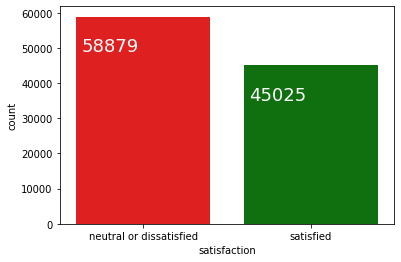

In [ ]:
ax=sns.countplot(x=dataset['satisfaction'], data=dataset, palette=['red',"green"]);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

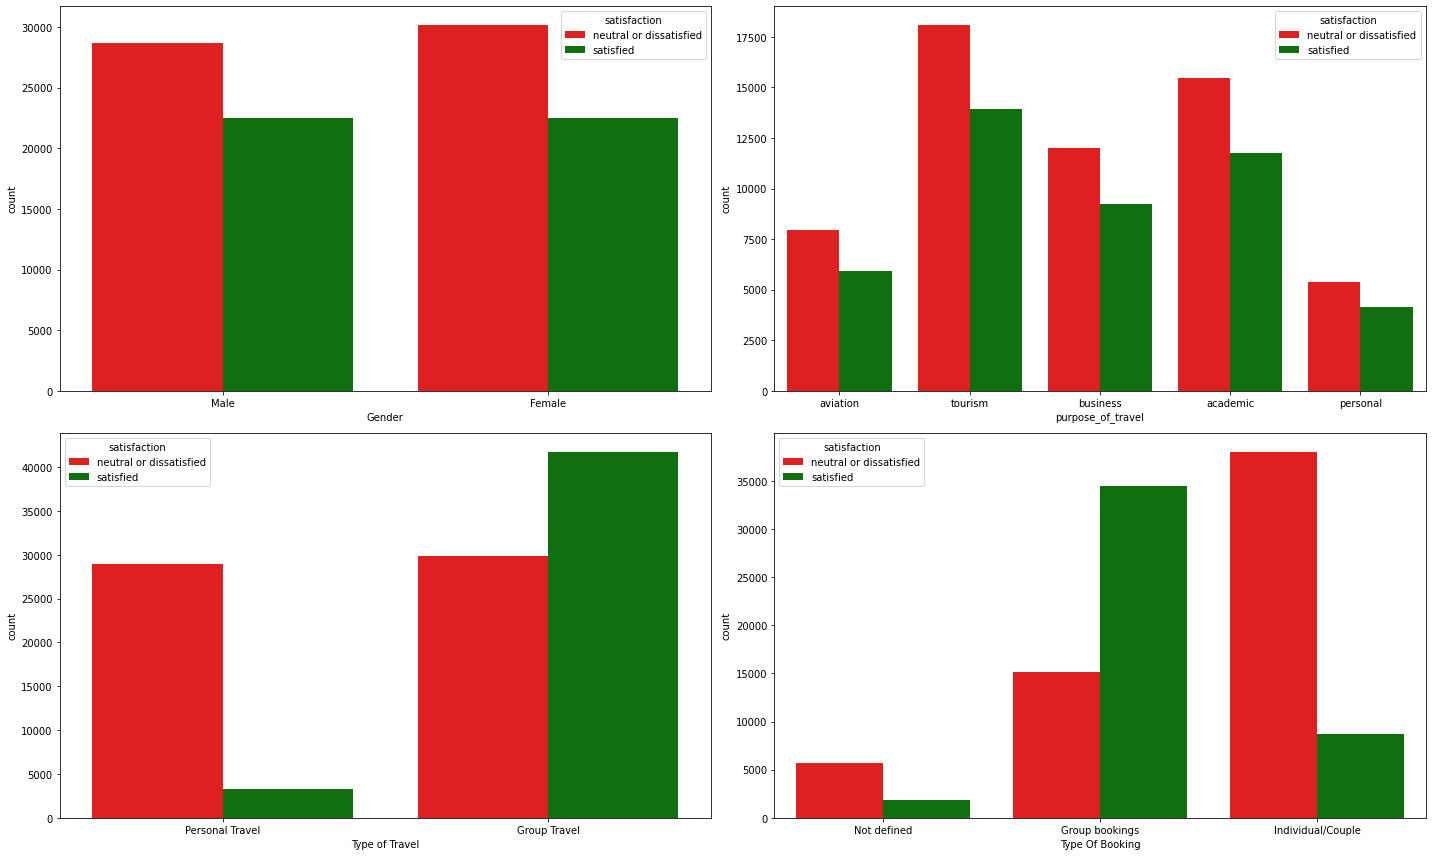

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))
sns.countplot(data=dataset, x='Gender', hue='satisfaction',palette=['red',"green"], ax=ax[0][0])
sns.countplot(data=dataset, x='purpose_of_travel', hue='satisfaction',palette=['red',"green"], ax=ax[0][1])
sns.countplot(data=dataset, x='Type of Travel', hue='satisfaction',palette=['red',"green"], ax=ax[1][0])
sns.countplot(data=dataset, x='Type Of Booking', hue='satisfaction',palette=['red',"green"], ax=ax[1][1])
plt.tight_layout();

In [ ]:
dataset.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

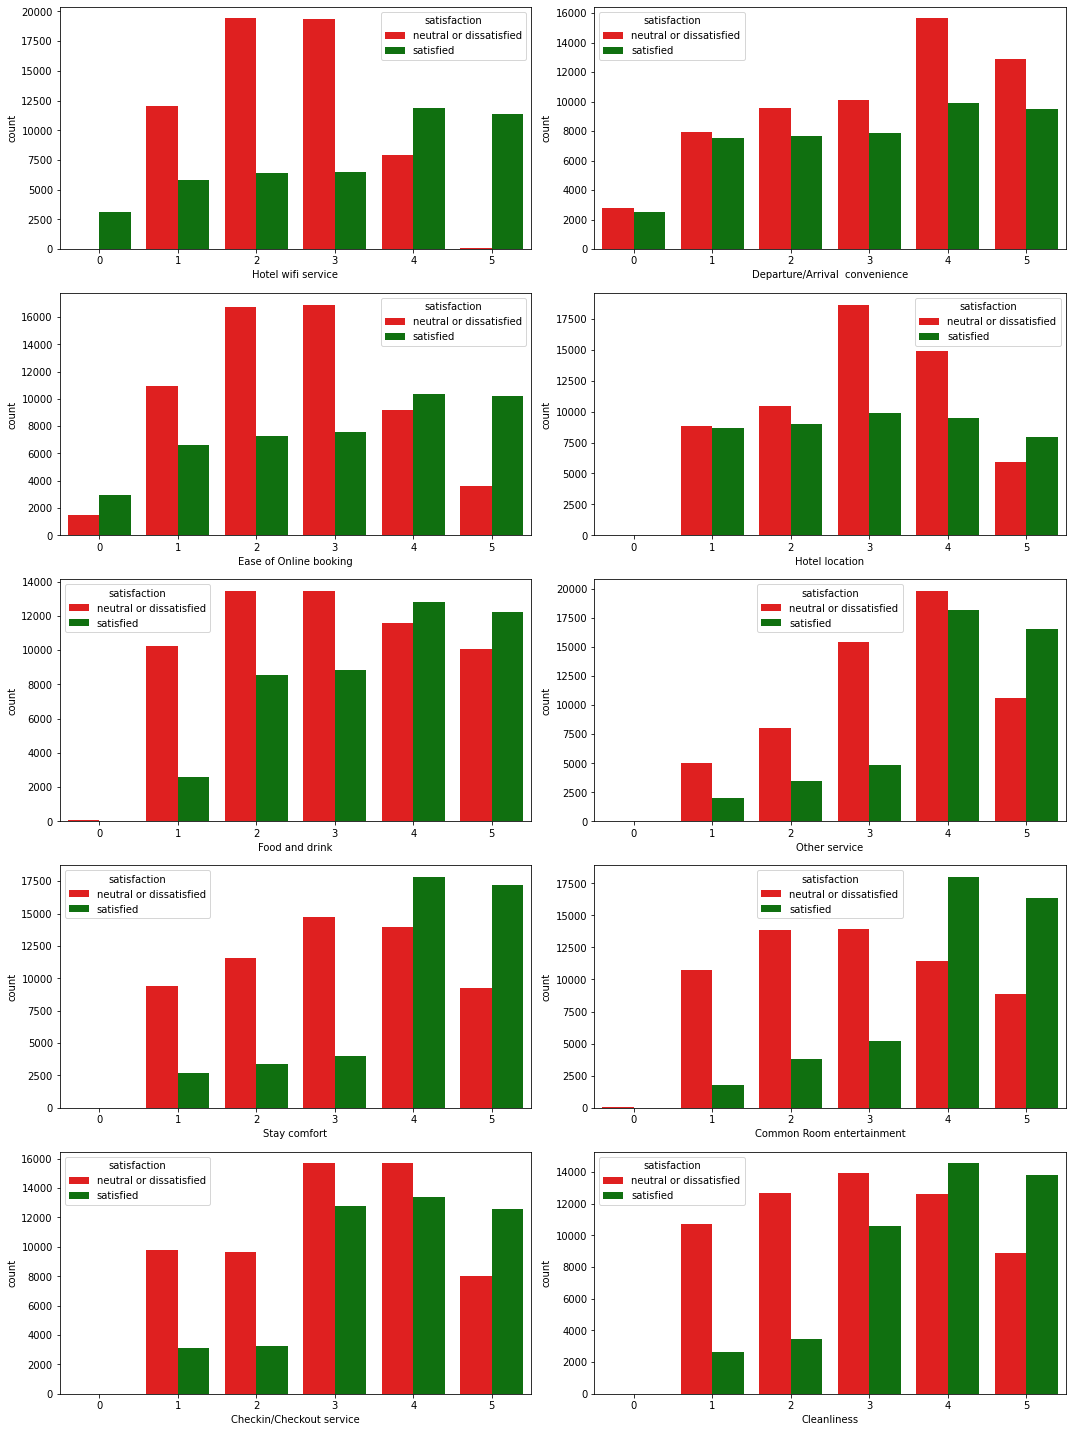

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(15, 20))
sns.countplot(data=dataset, x='Hotel wifi service', hue='satisfaction',palette=['red',"green"], ax=ax[0][0])
sns.countplot(data=dataset, x='Departure/Arrival  convenience', hue='satisfaction',palette=['red',"green"], ax=ax[0][1])
sns.countplot(data=dataset, x='Ease of Online booking', hue='satisfaction',palette=['red',"green"], ax=ax[1][0])
sns.countplot(data=dataset, x='Hotel location', hue='satisfaction',palette=['red',"green"], ax=ax[1][1])
sns.countplot(data=dataset, x='Food and drink', hue='satisfaction',palette=['red',"green"], ax=ax[2][0])
sns.countplot(data=dataset, x='Other service', hue='satisfaction',palette=['red',"green"], ax=ax[2][1])
sns.countplot(data=dataset, x='Stay comfort', hue='satisfaction',palette=['red',"green"], ax=ax[3][0])
sns.countplot(data=dataset, x='Common Room entertainment', hue='satisfaction',palette=['red',"green"], ax=ax[3][1])
sns.countplot(data=dataset, x='Checkin/Checkout service', hue='satisfaction',palette=['red',"green"], ax=ax[4][0])
sns.countplot(data=dataset, x='Cleanliness', hue='satisfaction',palette=['red',"green"], ax=ax[4][1])
plt.tight_layout();

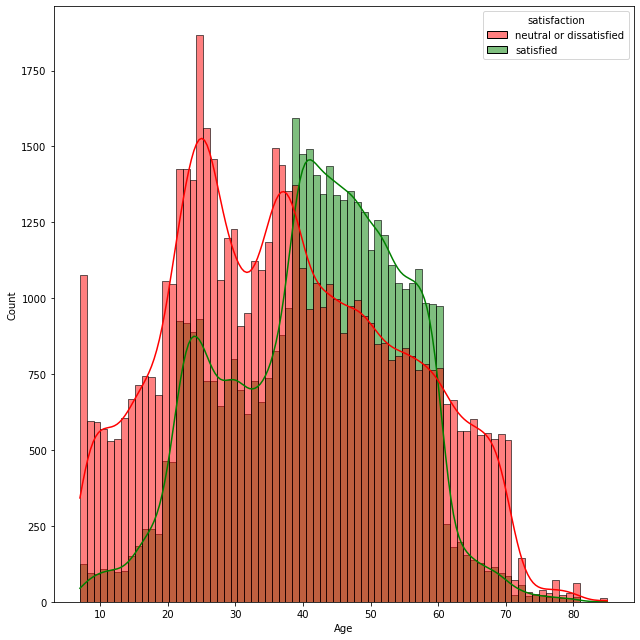

In [ ]:
plt.rcParams["figure.figsize"] = [9,9]
plt.rcParams["figure.autolayout"] = True
sns.histplot(data = dataset, x = "Age", kde = True, hue = "satisfaction",palette=['red',"green"])

#Data PreProcessing

In [ ]:
dataset[dataset.duplicated(keep=False)]

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction


In [ ]:
dataset.isnull().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [ ]:
dataset[dataset.isnull().any(axis=1)]

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction


In [ ]:
dataset.isna().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [ ]:
dataset.dtypes

id                                 int64
Gender                            object
Age                                int64
purpose_of_travel                 object
Type of Travel                    object
Type Of Booking                   object
Hotel wifi service                 int64
Departure/Arrival  convenience     int64
Ease of Online booking             int64
Hotel location                     int64
Food and drink                     int64
Stay comfort                       int64
Common Room entertainment          int64
Checkin/Checkout service           int64
Other service                      int64
Cleanliness                        int64
satisfaction                      object
dtype: object

In [ ]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset['Gender'] = label.fit_transform(dataset['Gender'])
dataset['Type of Travel'] = label.fit_transform(dataset['Type of Travel'])
dataset['Type Of Booking'] = label.fit_transform(dataset['Type Of Booking'])
dataset['satisfaction'] = LabelEncoder().fit_transform(dataset['satisfaction'])
dataset

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,1,13,aviation,1,2,3,4,3,1,5,5,5,4,5,5,0
1,5047,1,25,tourism,0,0,3,2,3,3,1,1,1,1,4,1,0
2,110028,0,26,tourism,0,0,2,2,2,2,5,5,5,4,4,5,1
3,24026,0,25,tourism,0,0,2,5,5,5,2,2,2,1,4,2,0
4,119299,1,61,aviation,0,0,3,3,3,3,4,5,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,0,23,business,0,1,2,1,2,3,2,2,2,2,3,2,0
103900,73097,1,49,tourism,0,0,4,4,4,4,2,5,5,5,5,4,1
103901,68825,1,30,tourism,0,0,1,1,1,3,4,5,4,5,5,4,0
103902,54173,0,22,business,0,1,1,1,1,5,1,1,1,5,4,1,0


In [ ]:
dataset.dtypes

id                                 int64
Gender                             int64
Age                                int64
purpose_of_travel                 object
Type of Travel                     int64
Type Of Booking                    int64
Hotel wifi service                 int64
Departure/Arrival  convenience     int64
Ease of Online booking             int64
Hotel location                     int64
Food and drink                     int64
Stay comfort                       int64
Common Room entertainment          int64
Checkin/Checkout service           int64
Other service                      int64
Cleanliness                        int64
satisfaction                       int64
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ct = OneHotEncoder()
datasetOneHotEncode = pd.DataFrame(ct.fit_transform(dataset[["purpose_of_travel"]]).toarray(),
                   columns=ct.get_feature_names_out())
dataset.drop(columns=["purpose_of_travel"], inplace=True)
dataset = dataset.join(datasetOneHotEncode)
dataset

,id,Gender,Age,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,...,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism
0,70172,1,13,1,2,3,4,3,1,5,...,5,4,5,5,0,0.0,1.0,0.0,0.0,0.0
1,5047,1,25,0,0,3,2,3,3,1,...,1,1,4,1,0,0.0,0.0,0.0,0.0,1.0
2,110028,0,26,0,0,2,2,2,2,5,...,5,4,4,5,1,0.0,0.0,0.0,0.0,1.0
3,24026,0,25,0,0,2,5,5,5,2,...,2,1,4,2,0,0.0,0.0,0.0,0.0,1.0
4,119299,1,61,0,0,3,3,3,3,4,...,3,3,3,3,1,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,0,23,0,1,2,1,2,3,2,...,2,2,3,2,0,0.0,0.0,1.0,0.0,0.0
103900,73097,1,49,0,0,4,4,4,4,2,...,5,5,5,4,1,0.0,0.0,0.0,0.0,1.0
103901,68825,1,30,0,0,1,1,1,3,4,...,4,5,5,4,0,0.0,0.0,0.0,0.0,1.0
103902,54173,0,22,0,1,1,1,1,5,1,...,1,5,4,1,0,0.0,0.0,1.0,0.0,0.0


In [ ]:
dataset.dtypes

id                                  int64
Gender                              int64
Age                                 int64
Type of Travel                      int64
Type Of Booking                     int64
Hotel wifi service                  int64
Departure/Arrival  convenience      int64
Ease of Online booking              int64
Hotel location                      int64
Food and drink                      int64
Stay comfort                        int64
Common Room entertainment           int64
Checkin/Checkout service            int64
Other service                       int64
Cleanliness                         int64
satisfaction                        int64
purpose_of_travel_academic        float64
purpose_of_travel_aviation        float64
purpose_of_travel_business        float64
purpose_of_travel_personal        float64
purpose_of_travel_tourism         float64
dtype: object

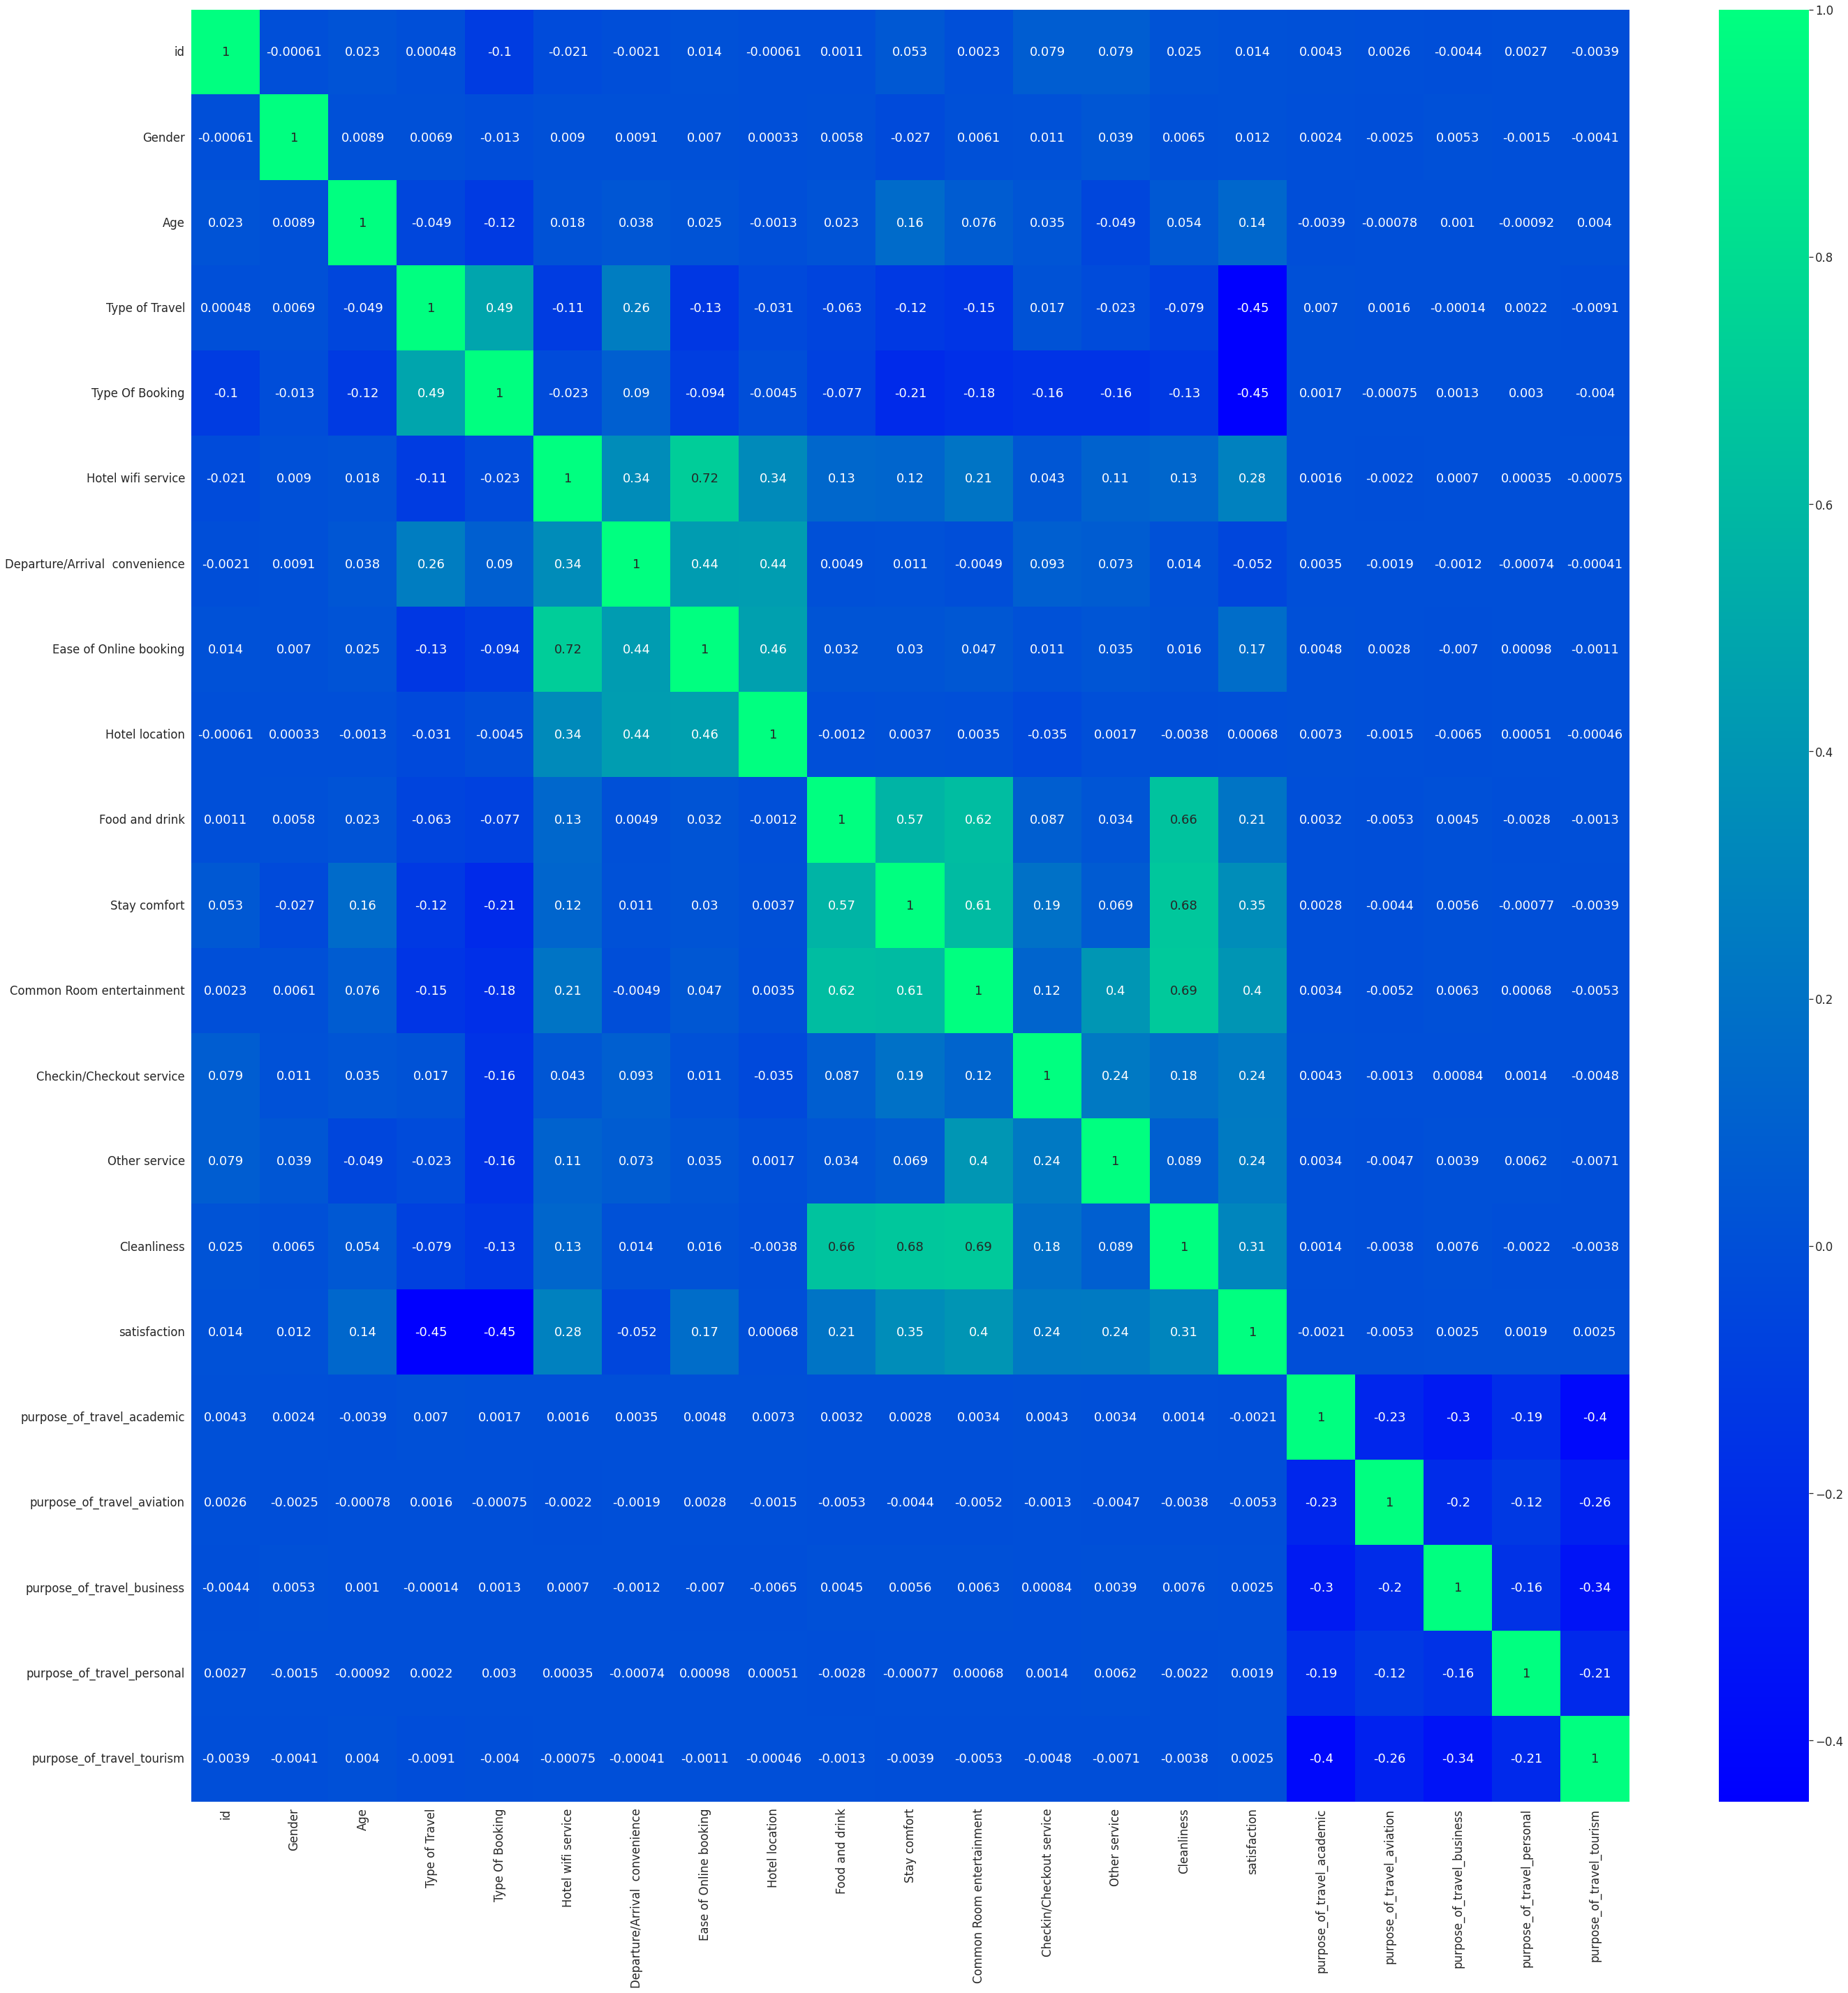

In [ ]:
# Create correlation matrix
dataset_corr = dataset.corr()
plt.figure(figsize=(40,40))
sns.set(font_scale=1.5)
sns.heatmap(dataset_corr, annot=True, cmap='winter',fmt='.2g' )

In [ ]:
y= dataset['satisfaction']
X= dataset.drop(['satisfaction', 'id'],1)
print(X)

        Gender  Age  Type of Travel  Type Of Booking  Hotel wifi service  \
0            1   13               1                2                   3   
1            1   25               0                0                   3   
2            0   26               0                0                   2   
3            0   25               0                0                   2   
4            1   61               0                0                   3   
...        ...  ...             ...              ...                 ...   
103899       0   23               0                1                   2   
103900       1   49               0                0                   4   
103901       1   30               0                0                   1   
103902       0   22               0                1                   1   
103903       1   27               0                0                   1   

        Departure/Arrival  convenience  Ease of Online booking  \
0                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
print(y)

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64


In [ ]:
# Splitting Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Gender,Age,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism
20921,0,59,1,1,4,5,4,1,5,5,2,5,2,4,1.0,0.0,0.0,0.0,0.0
36897,0,40,0,0,4,4,4,2,1,5,1,3,5,1,0.0,0.0,0.0,0.0,1.0
8468,1,65,1,1,2,3,2,1,1,1,1,5,5,1,1.0,0.0,0.0,0.0,0.0
53490,0,70,1,1,3,5,3,4,3,4,5,3,5,5,1.0,0.0,0.0,0.0,0.0
78687,0,25,0,1,2,2,2,3,1,1,1,5,2,1,1.0,0.0,0.0,0.0,0.0


In [ ]:
print(y_train)

20921     0
36897     0
8468      0
53490     0
78687     0
         ..
54886     0
76820     0
103694    0
860       1
15795     0
Name: satisfaction, Length: 83123, dtype: int64


In [ ]:
print(X_test)

       Gender  Age  Type of Travel  Type Of Booking  Hotel wifi service  \
80638       0   26               1                1                   2   
43398       1   22               0                0                   3   
32751       0   59               1                1                   1   
33571       0   32               1                1                   2   
71287       1   35               0                0                   2   
...       ...  ...             ...              ...                 ...   
8158        1   42               0                0                   1   
53718       1   14               1                1                   2   
33319       1    9               1                1                   2   
99162       0   45               0                0                   3   
96811       1   31               0                2                   4   

       Departure/Arrival  convenience  Ease of Online booking  Hotel location  \
80638             

In [ ]:
print(y_test)

80638    0
43398    0
32751    0
33571    0
71287    0
        ..
8158     0
53718    0
33319    0
99162    1
96811    1
Name: satisfaction, Length: 20781, dtype: int64


# Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#rf
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_test_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

#dt
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_test_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

#logreg
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

#knn
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
y_test_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [ ]:
results = pd.DataFrame({
    'Model' : ['Random Forest', 'Decision Tree ', 'Logistic Regression', 'KNN'],
    'Score' : [acc_random_forest, acc_decision_tree, acc_log, acc_knn]})
results_df = results.sort_values(by='Score', ascending=False)
results_df = results_df.set_index('Score')
results_df.head(9)

,Model
Score,
99.94,Random Forest
99.94,Decision Tree
92.77,KNN
83.73,Logistic Regression


## Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
model_dt = dt.fit(X_train, y_train)
y_test_pred = model_dt.predict(X_test)
y_train_pred = model_dt.predict(X_train)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt, X_train, y_train, cv=cv)
Val_score = scores.mean()
print("Validation Accuracy:", round(Val_score * 100,2),"%")
Train_Accuracy = accuracy_score(y_train, y_train_pred)
Test_Accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Validation Accuracy: 92.14 %
Train Accuracy : 99.94 %
Test Accuracy : 92.8 %


In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

print ('hasil akurasi dari data training: ', dt.score(X_train, y_train))
print ('hasil akurasi dari data testing: ', dt.score(X_test, y_test))

hasil akurasi dari data training:  0.911408394788446
hasil akurasi dari data testing:  0.9126124825561811


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

print("Akurasi: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Akurasi:  0.9126124825561811
Precision:  0.8871449925261584
Recall:  0.9162990736656375


In [ ]:
print("Report: ", classification_report(y_test, y_pred))

Report:                precision    recall  f1-score   support

           0       0.93      0.91      0.92     11713
           1       0.89      0.92      0.90      9068

    accuracy                           0.91     20781
   macro avg       0.91      0.91      0.91     20781
weighted avg       0.91      0.91      0.91     20781



In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

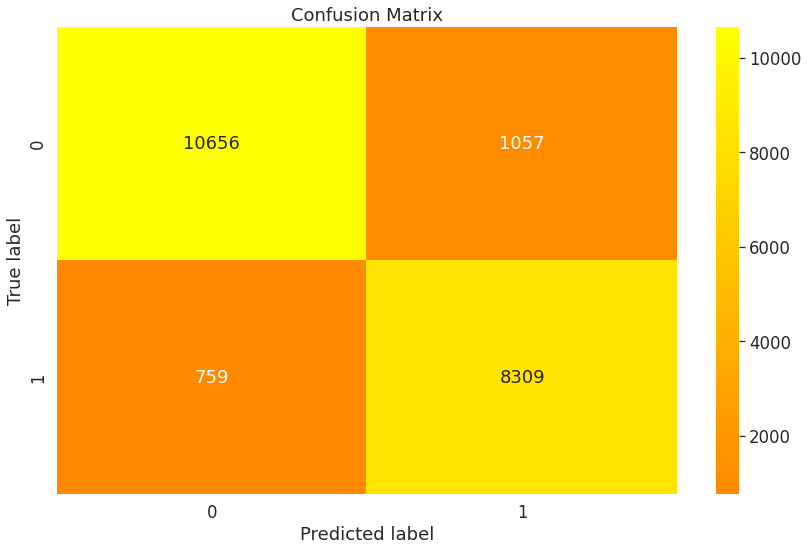

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm_dt = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_dt)

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
model_rf = rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=cv)
Val_score = scores.mean()
print("Validation Accuracy:", round(Val_score * 100,2),"%")
Train_Accuracy = accuracy_score(y_train, y_train_pred)
Test_Accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Validation Accuracy: 94.7 %
Train Accuracy : 99.94 %
Test Accuracy : 94.73 %


In [ ]:
# Instantiate a RandomForestClassifier 'rf' with number of tree 100
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# Fit dt to the training set
rf.fit(X_train, y_train)

# Predict test set labels
y_pred = rf.predict(X_test)

print ('hasil akurasi dari data training: ', rf.score(X_train, y_train))
print ('hasil akurasi dari data testing: ', rf.score(X_test, y_test))

hasil akurasi dari data training:  0.9608892845542149
hasil akurasi dari data testing:  0.9437466916895241


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

print("Akurasi: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Akurasi:  0.9437466916895241
Precision:  0.9420257414661444
Recall:  0.9282090868989854


In [ ]:
print("Report: ", classification_report(y_test, y_pred))

Report:                precision    recall  f1-score   support

           0       0.95      0.96      0.95     11713
           1       0.94      0.93      0.94      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

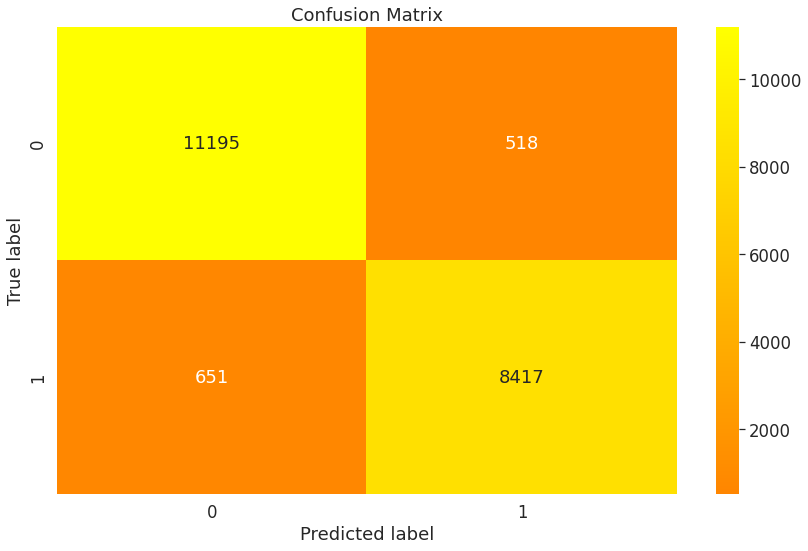

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_rf)

# Resampling to handle imbalanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

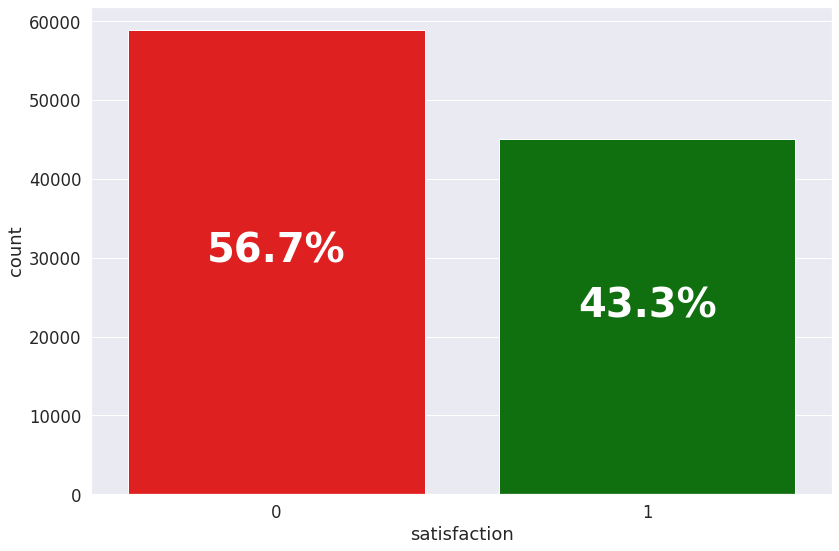

In [ ]:
fig = plt.figure(figsize = (12, 8))
axis = sns.countplot(x = 'satisfaction', data = dataset, palette=['red',"green"]);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(dataset)*100, 1)}%", 
            ha = 'center', size = 40, rotation = 0,weight = 'bold' ,color = 'white')

In [ ]:
y_train.value_counts()

0    47166
1    35957
Name: satisfaction, dtype: int64

In [ ]:
y_smote.value_counts()

0    47166
1    47166
Name: satisfaction, dtype: int64

## Random Forest after SMOTE

In [ ]:
rf = RandomForestClassifier(random_state=42)
model_rf = rf.fit(X_smote, y_smote)
y_test_pred = model_rf.predict(X_test)
y_smote_pred = model_rf.predict(X_smote)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_smote, y_smote, cv=cv)
Val_score = scores.mean()
print("Validation Accuracy:", round(Val_score * 100,2),"%")
Train_Accuracy = accuracy_score(y_smote, y_smote_pred)
Test_Accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Validation Accuracy: 95.04 %
Train Accuracy : 99.94 %
Test Accuracy : 94.65 %


In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [ ]:
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11713
           1       0.95      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

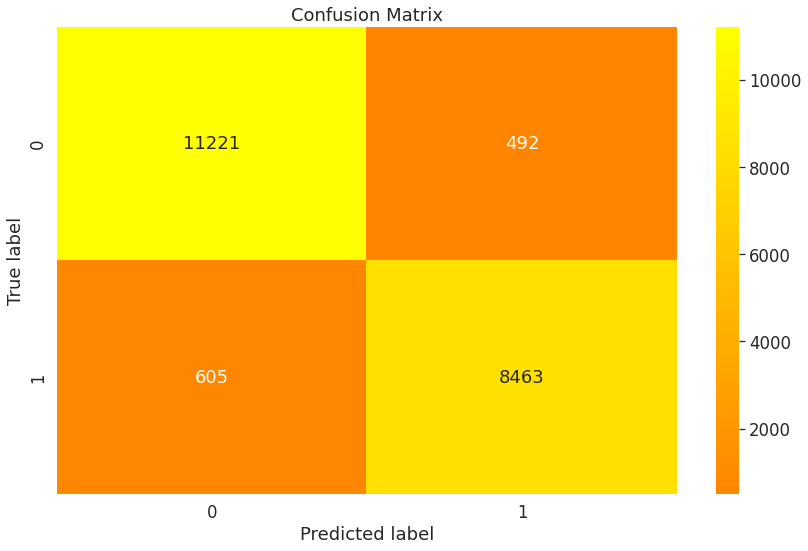

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_smote)
draw_confusion_matrix(cm_rf)

## Decision Tree after SMOTE

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
model_dt = dt.fit(X_smote, y_smote)
y_test_pred = model_dt.predict(X_test)
y_smote_pred = model_dt.predict(X_smote)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt, X_smote, y_smote, cv=cv)
Val_score = scores.mean()
print("Validation Accuracy:", round(Val_score * 100,2),"%")
Train_Accuracy = accuracy_score(y_smote, y_smote_pred)
Test_Accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Validation Accuracy: 92.77 %
Train Accuracy : 99.94 %
Test Accuracy : 92.52 %


In [ ]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [ ]:
y_pred_smote = dt_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11713
           1       0.91      0.92      0.91      9068

    accuracy                           0.93     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

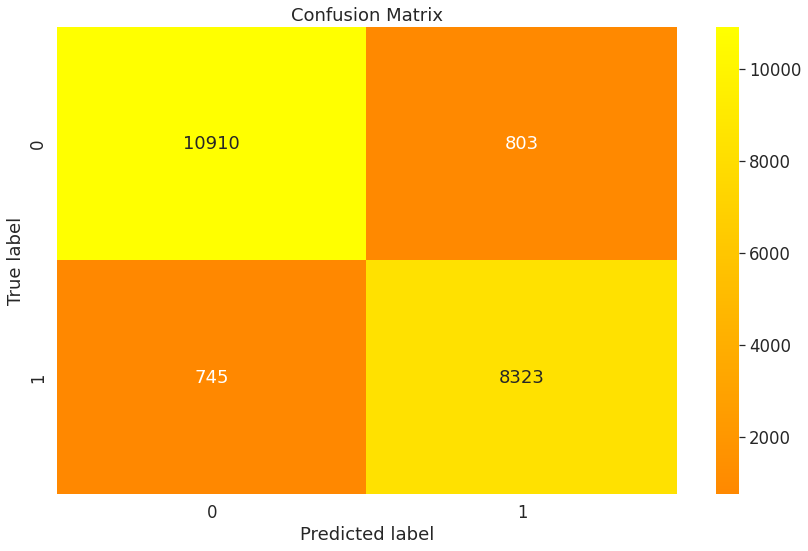

In [ ]:
cm_dt = confusion_matrix(y_test,y_pred_smote)
draw_confusion_matrix(cm_dt)

# HyperParameter

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
max_depth = np.arange(20,41,5)
max_n = np.arange(100,301,50)
param_grid = dict(max_depth=max_depth, n_estimators=max_n)
grid = GridSearchCV(estimator=rf, param_grid=param_grid,)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.max_depth)
print(grid.best_estimator_.n_estimators)

0.9471265835425908
25
150


In [ ]:
#Before max depth =20 , n_estimators=100
rf = RandomForestClassifier(random_state=42, max_depth=20, n_estimators=100)
model_rf_smote_hp = rf.fit(X_smote, y_smote)
y_test_pred = model_rf_smote_hp.predict(X_test)
y_smote_pred = model_rf_smote_hp.predict(X_smote)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_smote, y_smote, cv=cv)
Val_score = scores.mean()
print("Validation Accuracy:", round(Val_score * 100,2),"%")
Train_Accuracy = accuracy_score(y_smote, y_smote_pred)
Test_Accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Validation Accuracy: 94.86 %
Train Accuracy : 98.82 %
Test Accuracy : 94.63 %


In [ ]:
#After max depth =25, n_estimators=150
rf = RandomForestClassifier(random_state=42, max_depth=25, n_estimators=150)
model_rf_smote_hp = rf.fit(X_smote, y_smote)
y_test_pred = model_rf_smote_hp.predict(X_test)
y_smote_pred = model_rf_smote_hp.predict(X_smote)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_smote, y_smote, cv=cv)
Val_score = scores.mean()
print("Validation Accuracy:", round(Val_score * 100,2),"%")
Train_Accuracy = accuracy_score(y_smote, y_smote_pred)
Test_Accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Validation Accuracy: 95.05 %
Train Accuracy : 99.76 %
Test Accuracy : 94.77 %


In [ ]:
y_pred_smote_hp = model_rf_smote_hp.predict(X_test)
print(classification_report(y_test, y_pred_smote_hp))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11713
           1       0.94      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='winter') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

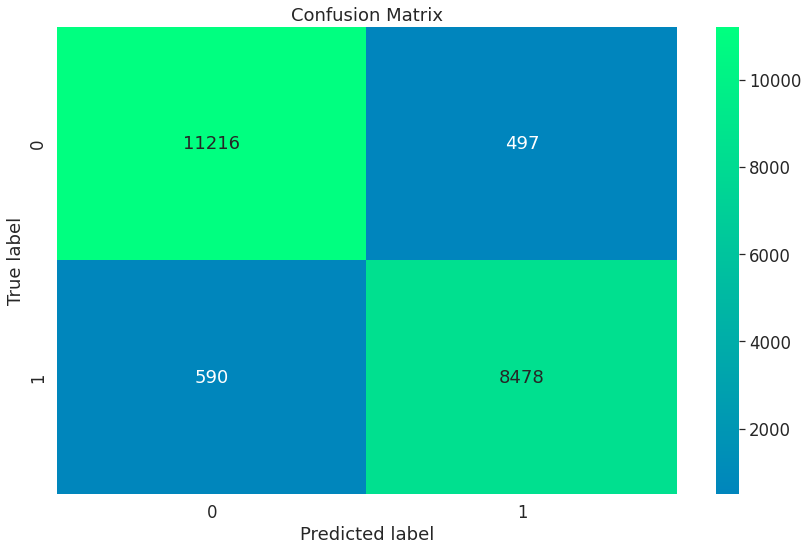

In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_smote_hp)
draw_confusion_matrix(cm_rf)

# Feature Importance

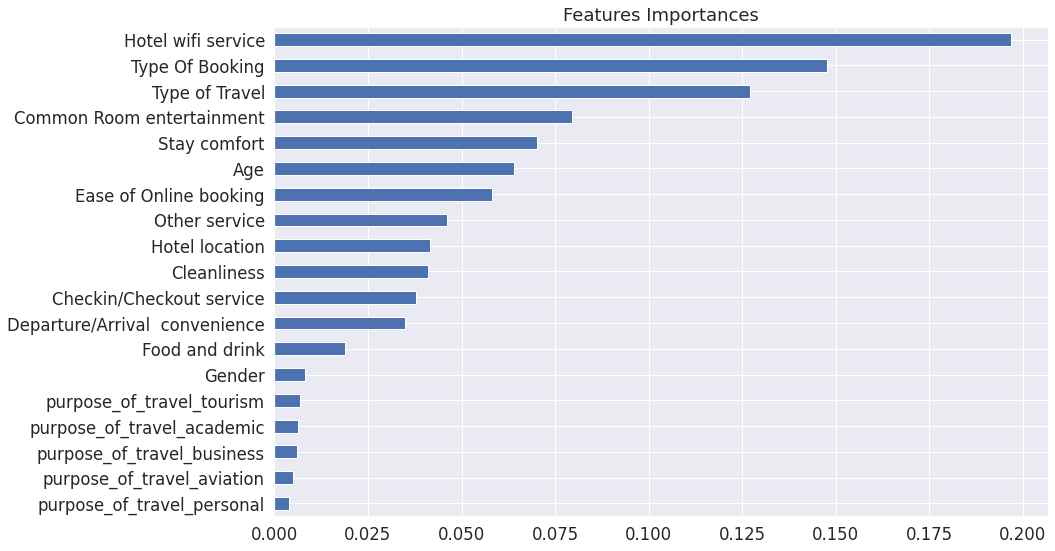

In [ ]:
importances = pd.Series(data=model_rf_smote_hp.feature_importances_,
                        index= X_smote.columns)

importances_sorted = importances.sort_values()
plt.figure(figsize=(15,8))
importances_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.show()